***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 02/01/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [4]:
#%matplotlib notebook
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [5]:
Stoich = pd.read_csv("Stoich_1.csv")    #Opening/Reading the Stoichiometric input file needed to be read
Atomic = pd.read_csv("Atomic_1.csv")     #Opening/Reading the Atomic input file needed to be read
Param = pd.read_csv("Param_1.csv")[:13]     #Opening/Reading the Parameter input file needed to be read   
print("Reaction\Stoichiometric Matrix:\n",Stoich)
print("\n Atomic\Species Matrix:\n",Atomic)
print("\n Parameters Matrix:\n",Param)

Reaction\Stoichiometric Matrix:
   r\S  P_CO  P_O2  P_CO2  theta_CO  theta_O  theta_O2  theta_*
0  r1    -1     0      0         1        0         0       -1
1  r2     0    -1      0         0        0         1       -1
2  r3     0     0      0         0        2        -1       -1
3  r4     0     0      1        -1       -1         0        2

 Atomic\Species Matrix:
   A\S  CO  O2  CO2  CO*  O*  O2*  *
0   C   1   0    1    1   0    0  0
1   O   1   2    2    1   1    2  0
2   *   0   0    0    1   1    1  1

 Parameters Matrix:
    Reaction_Descrp Parameter        Values        Units
0              NaN         T  3.200000e+02            K
1              NaN         R  8.314460e+00  JK^-1mol^-1
2               CO        P1  1.000000e-08          bar
3               O2        P2  1.000000e-08          bar
4              CO2        P3  1.000000e-08          bar
5               r1       k1f  2.000000e+00            -
6              NaN       k1r  6.650000e-09            -
7           

In [6]:
#Checking the mass balance
at_mat = Atomic.iloc[0:,1:]           #The atomic matrix
err = 0                               #For counting error
for i in np.arange(len(Stoich)):    
    st_mat = Stoich.iloc[i,1:]        #The stoichiometric matrix
    res = np.dot(at_mat,st_mat)       #Performing the matrix product for every reaction i
    if any(a != 0 for a in res):      #Verifies that the matrix product returns 0s (i.e mass is balanced)
        print("Mass is not conserved in reaction %i. \n ... Check and correct the Atomic or Stoichiometric Matrices"%(i+1))
        err +=1
    elif (i == len(Stoich)-1 and err==0):    
        print("Mass is conserved.")

Mass is conserved.


In [7]:
#Extracting K values
def kextract(Param):
    #Evaluating Param file to find where the list of rate constants k starts
    for j in np.arange(len(Param.iloc[:,1])):
        if ('k1f' or 'k1') in Param.iloc[j,1]:
            kstart = j #Row in the Param file where rate constants begin
            break
        else:
            continue

    #Rate Constants:
    k = Param.iloc[kstart:,2].values #.values changes from pandas series to numpy array, allows for more optimization
    return k

In [8]:
def sol(t,u,k,Atomic,Stoich):
    #Only need to change:
   
    #------------------------------------------
    # 1 = CO ; 2 = O ; 3 = O2 ; 4 = *
    #Surface Coverage 
    th1 = u[0] #Theta_CO 
    th2 = u[1] #Theta_O
    th3 = u[2] #Theta_O2
    th4 = u[3] #Theta_*
    THETA = [th1,th2,th3,th4] #Coverages being investigated
        #Partial Pressures (Assuming all same as P)
    P1 = Param.iloc[1,2]#P_CO
    P2 = Param.iloc[1,2]#P_O2
    P3 = Param.iloc[1,2]#P_CO2
    #------------------------------------------
    
    Nr = len(Stoich) #Number of rows in your your stoich matrix, i.e (Number of reactions)
    

    kf = k[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
    kr = k[1::2] #Pulling out the reverse rxn rate constants 

    D = []      #Empty Vector For holding rate of change of coverage values
    r = [None] * Nr  #Empty Vector for holding rate of a specific reaction
    
    #Calculating the rates of reactions:
    for j in np.arange(Nr):   #Looping through the reactions
        matr = [P1,P2,P3]+THETA
        fwd = []
        rvs = []
        for i in np.arange(len(Stoich.iloc[0,:])-1):
            if Stoich.iloc[j,i+1]<0: #extracting only forward relevant rate parameters  #forward rxn reactants /encounter probability
                fwd.append(matr[i]**abs(Stoich.iloc[j,i+1]))
                
            if Stoich.iloc[j,i+1]>0: #extracting only reverse relevant rate parameters  #reverse rxn reactants /encounter probability
                rvs.append(matr[i]**abs(Stoich.iloc[j,i+1]))   
                
        r[j] = (kf[j]*np.prod(fwd)) - (kr[j]*np.prod(rvs)) #Calculating the rate of reaction
    

    #Differential Equations to calculate the change in coverages
    for i in np.arange(len(Stoich.iloc[:,4:])):
        dsum=0
        for j in np.arange(Nr):
            
            dsum += Stoich.iloc[j,i+4]*r[j] #Calculating the rate of production of a species i
        
        D.append(dsum)

    return D  #   CO |  O  |  O2   |  *

def Kinetics(k,Atomic,Stoich,init,Time,Teval=None):
    t_span = (Time[0], Time[-1])
    solve = solve_ivp(sol,t_span,init, args=(k,Atomic,Stoich),method='BDF', t_eval=Teval, rtol = 1E-8,atol = 1E-8,h0 = 1E-50)
    solv = np.transpose(solve.y)
    #print(k)
    return solv

Running the ODE solver: (Getting the coverage profiles)

In [9]:
%%time
#initial values:
TCO_in = 0.0
TO_in = 0.0
TO2_in = 0.0
TE_in = 1 - TCO_in-TO_in-TO2_in
#init      CO | O  | O2   | *
init = [TCO_in,TO_in,TO2_in,TE_in]  #initial values

Time =np.linspace(0, 6e6, num=1000)
k = kextract(Param)
t_span = (Time[0], Time[-1])
solve = solve_ivp(sol,t_span,init, args=(k,Atomic,Stoich),method='BDF', rtol = 1E-6,atol = 1E-8)#Obtaining the resulting Concentration of Coverages
solv = np.transpose(solve.y)
time_sol = np.transpose(solve.t)

print(len(time_sol))

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `h0`.
  warn("The following arguments have no effect for a chosen solver: {}."


400
CPU times: user 2.93 s, sys: 18.8 ms, total: 2.95 s
Wall time: 2.94 s


# Implementing MKM ToolKit

In [11]:
from main import *
# %matplotlib notebook

In [12]:
fit = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit.Input

Mass is conserved. 



,Time,C_CO,C_O,C_O2,C_E
0,0.0,0.000000,0.000000,0.0,1.000000
1,0.1,0.006076,0.030490,0.0,0.963433
2,0.2,0.011013,0.055556,0.0,0.933431
3,0.3,0.014431,0.075792,0.0,0.909776
4,0.4,0.018989,0.098362,0.0,0.882650
...,...,...,...,...,...
246,24.6,0.008464,0.442763,0.0,0.548774
247,24.7,0.007541,0.442274,0.0,0.550184
248,24.8,0.008030,0.442491,0.0,0.549479
249,24.9,0.008084,0.441732,0.0,0.550184


In [13]:
time_sol = fit.Input.to_numpy()[:,0]
C_CO = fit.Input.to_numpy()[:,1]
C_O = fit.Input.to_numpy()[:,2]
C_O2 = fit.Input.to_numpy()[:,3]
C_E = fit.Input.to_numpy()[:,4]

Plotting:

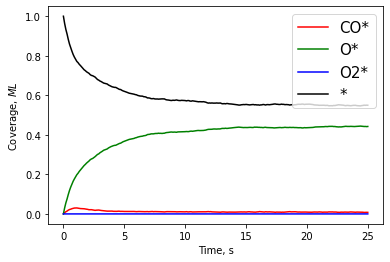

In [14]:
plt.figure(1)
plt.plot(time_sol, C_CO,'r-', label='CO*')        
plt.plot(time_sol, C_O,'g-', label='O*') 
plt.plot(time_sol, C_O2, 'b-', label='O2*') 
plt.plot(time_sol, C_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=15, loc='best')
plt.show()

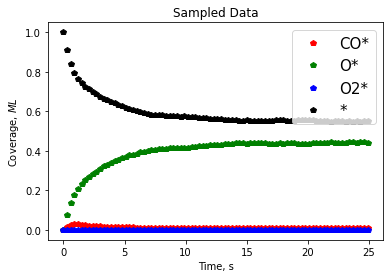

In [15]:
n = 80
Time_t = time_sol[::round(len(time_sol)/n)]
C_t_CO = C_CO[::round(len(C_CO)/n)]
C_t_O = C_O[::round(len(C_O)/n)]
C_t_O2 = C_O2[::round(len(C_O2)/n)]
C_t_E = C_E[::round(len(C_E)/n)]

plt.figure(2)
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*')

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.title('Sampled Data')
plt.legend(fontsize=15, loc='best')
plt.show()

In [17]:
Guess_Param = pd.read_csv("Param.csv")[:13]     #Opening/Reading the Parameter input file needed to be read   
print("\n The Guess Parameters Matrix:\n",Guess_Param)
print("\n")


 The Guess Parameters Matrix:
    Reaction_Descrp Parameter        Values        Units
0              NaN         T  3.200000e+02            K
1              NaN         R  8.314460e+00  JK^-1mol^-1
2               CO        P1  1.000000e-08          bar
3               O2        P2  1.000000e-08          bar
4              CO2        P3  1.000000e-08          bar
5               r1       k1f  5.810000e-02            -
6              NaN       k1r  6.650000e-09            -
7               r2       k2f  7.690000e+02            -
8              NaN       k2r  1.150000e+05            -
9               r3       k3f  2.600000e+05            -
10             NaN       k3r  2.140000e-02            -
11              r4       k4f  1.350000e+00            -
12             NaN       k4r  5.000000e+02            -




In [18]:
Guessk = kextract(Guess_Param)

In [19]:
C_dat = np.c_[C_t_CO,C_t_O,C_t_O2,C_t_E]

def minfunc(Guessk,Atomic,Stoich,Time,Conc):
    
    Conc_init = Conc[0,:]
    c_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    w = 1e4
    error_t = w*abs(Conc[:,0] - c_estim[:,0]) +w*abs(Conc[:,1] - c_estim[:,1])+w*abs(Conc[:,2] - c_estim[:,2])+w*abs(Conc[:,3] - c_estim[:,3])
        
    error = sum(error_t)
    return error  

### [ A ] Using Curve Fit [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

### Simple Fitting - Testing out different Curve Fit functions

In [20]:
%%time
#5 - parameter function fitting
def test_func(x, a, b,c,d,e):
    func1 = (a*x)**5 + (b*x)**4 + (c*x)**3 + (d*x)**2 + (e*x)**1 #polynomial
    func2 = b*np.exp(-x/abs(a)) + (1-b)*np.exp(-x/abs(c)) + (1-c)*np.exp(-x/abs(d)) + (1-d)*np.exp(-x/abs(e)) #quadruple exponential function ft from correlation time fitting
    func3 = b*np.log(x/abs(a)) + (1-b)*np.log(x/abs(c)) + (1-c)*np.log(x/abs(d)) + (1-d)*np.log(x/abs(e)) #log version of see above
    func4 = np.sin(x*a/np.pi)+np.cos(x*b/np.pi)+np.cos(x*c/np.pi)+np.sin(x*d/np.pi)+np.cos(x*e/np.pi) # fourier series
    func5 = a * np.exp(-b * x) +  c * np.exp(-d * x) + e  #simple exponential fit
    return  func5

c_fit = np.empty([len(C_dat[0:,]),len(C_dat[0])])

for i in np.arange(len(C_dat[0])):
    x_values = Time_t
    y_values = C_dat[:,i]
    params, params_covariance = optimize.curve_fit(test_func, x_values, y_values, method ='lm', maxfev=5000,
                                                   p0=[1, 1, 1, 1, 1])
    res_a = test_func(x_values, *params)#[0], params[1],params[2],params[3],params[4])
    
    c_fit[:,i]=res_a    

CPU times: user 81.3 ms, sys: 2.37 ms, total: 83.6 ms
Wall time: 85.3 ms


<timed exec>:5: RuntimeWarning: divide by zero encountered in log
<timed exec>:5: RuntimeWarning: invalid value encountered in multiply
<timed exec>:5: RuntimeWarning: invalid value encountered in add
<timed exec>:7: RuntimeWarning: overflow encountered in exp
<timed exec>:7: RuntimeWarning: overflow encountered in multiply


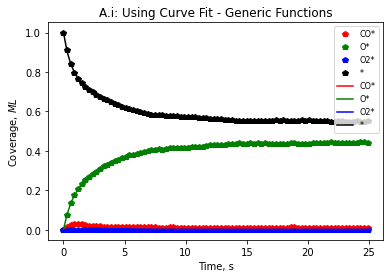

In [21]:
plt.figure(3)
C_fit_CO = c_fit[:,0]
C_fit_O = c_fit[:,1]
C_fit_O2 = c_fit[:,2]
C_fit_E = c_fit[:,3]


#Replotting the extracted dataset
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_t, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_t, C_fit_O,'g-', label='O*') 
plt.plot(Time_t, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_t, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("A.i: Using Curve Fit - Generic Functions")
plt.show()

### Simple Fitting Using Curve Fit - Implementing Kinetic Function

In [25]:
%%time
from numpy import inf
#k - parameter function fitting
def test_func(x, *Guess):
    #Guess = np.asarray(Guess)
    Conc_init = C_dat[0,:]
    func = Kinetics(Guess,Atomic,Stoich,Conc_init,Time_t,Time_t)
    func = np.reshape(func, func.size)
    return  func

x_values = Time_t
y_values = np.reshape(C_dat, C_dat.size)
params, params_covariance = optimize.curve_fit(test_func, x_values, y_values, method ='trf',xtol=1e-8,ftol=1e-8
                                               ,maxfev=1e5, bounds=(0,inf)
                                                ,p0=Guessk)
res_a = test_func(x_values, *params)
    
c_fit=res_a.reshape(np.shape(C_dat))    

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `h0`.
  warn("The following arguments have no effect for a chosen solver: {}."


CPU times: user 20min 14s, sys: 24.7 s, total: 20min 38s
Wall time: 19min


In [26]:
print(params)
print('conf:', np.sqrt(np.diag(params_covariance)))

[4.19506702e+00 1.58821408e+04 2.31455777e-03 2.43122226e+05
 2.73022473e+05 8.82241500e+02 5.44497953e+01 5.71269010e+01]
conf: [1.15587127e+04 3.59155505e+07 1.52696490e+03 5.48038584e+08
 2.80114383e+09 3.56821134e+06 9.53207019e+05 1.29004729e+05]


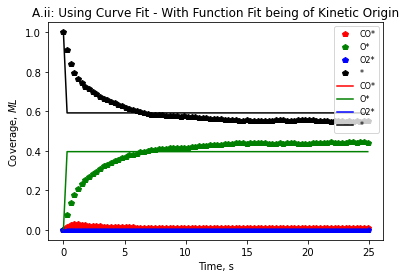

In [27]:
plt.figure(4)
C_fit_CO = c_fit[:,0]
C_fit_O = c_fit[:,1]
C_fit_O2 = c_fit[:,2]
C_fit_E = c_fit[:,3]


#Replotting the extracted dataset
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_t, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_t, C_fit_O,'g-', label='O*') 
plt.plot(Time_t, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_t, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("A.ii: Using Curve Fit - With Function Fit being of Kinetic Origin")
plt.show()

# --------------------------------------------------------------------------------------

### [ B ] Using Differential Evolution [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)

In [17]:
%%time
from scipy.optimize import curve_fit, differential_evolution    
Guessk = k*1.1
def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res_b = differential_evolution(error_fun,
                             bounds= bounds,
                             args=(Atomic,Stoich,Time_t,C_dat),
                             seed=42, maxiter=5,disp=True, polish=True,workers=1)

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `h0`.
  warn("The following arguments have no effect for a chosen solver: {}."


differential_evolution step 1: f(x)= 1.08781
differential_evolution step 2: f(x)= 1.08781
differential_evolution step 3: f(x)= 1.08781
differential_evolution step 4: f(x)= 0.88768
differential_evolution step 5: f(x)= 0.887245
CPU times: user 21min 37s, sys: 3.71 s, total: 21min 41s
Wall time: 21min 41s


[6.90159725e+01 0.00000000e+00 8.65829635e+03 6.49132576e+06
 5.43517747e+10 2.15730588e+00 1.36742023e-05 9.89030581e+02]


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `h0`.
  warn("The following arguments have no effect for a chosen solver: {}."


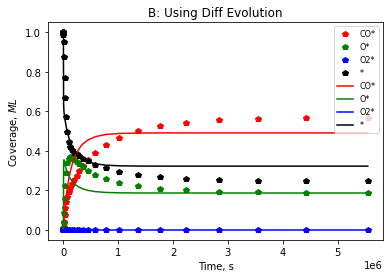

In [19]:
k_fit_b = res_b.x
print(k_fit_b)
c_fit = Kinetics(k_fit_b,Atomic,Stoich,init,Time_t,Time_t)

C_fit_CO = c_fit[:,0]
C_fit_O = c_fit[:,1]
C_fit_O2 = c_fit[:,2]
C_fit_E = c_fit[:,3]

plt.figure(5)
#Replotting the extracted dataset
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_t, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_t, C_fit_O,'g-', label='O*') 
plt.plot(Time_t, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_t, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("B: Using Diff Evolution")
plt.show()

### [ C ] Using SHGO - Simplicial homology global optimization [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo)

In [19]:
%%time
from scipy.optimize import shgo    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res_c = shgo(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     iters=1, options = {'ftol': 1e-06, 'gtol': 1e-06,'maxfun': 10, 'maxiter': 2, 'disp' : True})

Splitting first generation


/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `h0`.
  warn("The following arguments have no effect for a chosen solver: {}."


Starting minimization at [5.e+01 5.e-08 5.e+03 5.e+06 5.e+09 5.e-03 5.e-07 5.e+03]...
bounds in kwarg:
[[0.0, 100.0], [0.0, 1.0000000000000001e-07], [0.0, 10000.0], [0.0, 10000000.0], [0.0, 10000000000.0], [0.0, 0.01], [0.0, 1e-06], [0.0, 10000.0]]
lres =      fun: 4.337256188916157
     jac: array([ 3.36128473e-03, -3.63898043e+06,  7.71284103e-05,  5.36441803e-07,
       -4.35190916e-11,  4.37718506e+01, -6.91837706e+05,  3.29971313e-04])
 message: 'Optimization terminated successfully'
    nfev: 9
     nit: 5
    njev: 1
  status: 0
 success: True
       x: array([5.e+01, 5.e-08, 5.e+03, 5.e+06, 5.e+09, 5.e-03, 5.e-07, 5.e+03])
Successfully completed construction of complex.
CPU times: user 4min 18s, sys: 1.06 s, total: 4min 19s
Wall time: 4min 19s


In [21]:
def CI95(fvec, jac):
    #Returns the 95% confidence interval on parameters
    
    rss = np.sum(fvec**2) # residual sum of squares
    
    n, p = jac.shape     # number of data points and parameters
   
    nmp = n - p          # the statistical degrees of freedom
    
    ssq = rss / nmp      # mean residual error
    
    J = np.matrix(jac)   # the Jacobian
    
    c = inv(J.T*J)       # covariance matrix
    
    pcov = c * ssq       # variance-covariance matrix.
    # Diagonal terms provide error estimate based on uncorrelated parameters.
    
    err = np.sqrt(np.diag(np.abs(pcov))) * 1.96  # std. dev. x 1.96 -> 95% conf
    # Here err is the full 95% area under the normal distribution curve. 
    return err

[5.e+01 5.e-08 5.e+03 5.e+06 5.e+09 5.e-03 5.e-07 5.e+03]


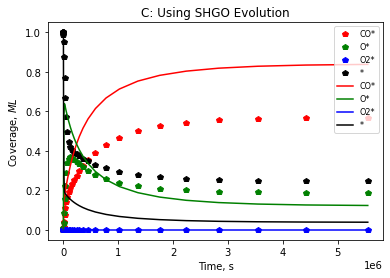

In [22]:
k_fit_c = res_c.x
print(k_fit_c)
c_fit = Kinetics(k_fit_c,Atomic,Stoich,init,Time_t,Time_t)

C_fit_CO = c_fit[:,0]
C_fit_O = c_fit[:,1]
C_fit_O2 = c_fit[:,2]
C_fit_E = c_fit[:,3]

plt.figure(6)
#Replotting the extracted dataset
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_t, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_t, C_fit_O,'g-', label='O*') 
plt.plot(Time_t, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_t, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("C: Using SHGO Evolution")
plt.show()

### [ D ] Using Dual Annealing - Combination of CSA (Classical Simulated Annealing) and FSA (Fast Simulated Annealing)  [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html?highlight=dual_annealing#scipy.optimize.dual_annealing)

In [23]:
%%time
from scipy.optimize import dual_annealing    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res_d = dual_annealing(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     maxiter=10, maxfun = 100)

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `h0`.
  warn("The following arguments have no effect for a chosen solver: {}."


CPU times: user 2min 8s, sys: 479 ms, total: 2min 8s
Wall time: 2min 8s


[9.51153567e+01 1.00000000e-07 5.50207940e+02 3.81803520e+06
 9.70853355e+09 3.89212570e-03 1.00000000e-06 1.18806586e+03]


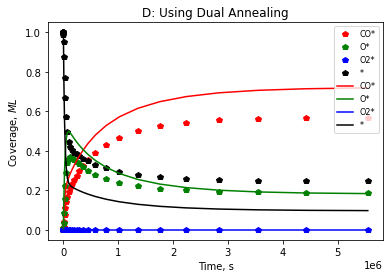

In [24]:
k_fit_d = res_d.x
print(k_fit_d)
c_fit = Kinetics(k_fit_d,Atomic,Stoich,init,Time_t,Time_t)

C_fit_CO = c_fit[:,0]
C_fit_O = c_fit[:,1]
C_fit_O2 = c_fit[:,2]
C_fit_E = c_fit[:,3]

plt.figure(7)
#Replotting the extracted dataset
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_t, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_t, C_fit_O,'g-', label='O*') 
plt.plot(Time_t, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_t, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("D: Using Dual Annealing")
plt.show()

### [ E ]  Using SPLINES [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html?highlight=univariatespline#scipy.interpolate.UnivariateSpline)

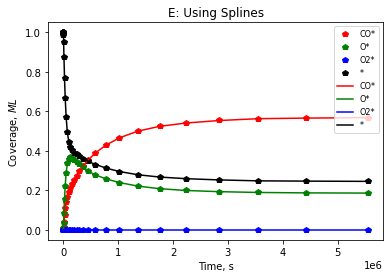

CPU times: user 90 ms, sys: 2.33 ms, total: 92.4 ms
Wall time: 93.3 ms


In [25]:
%%time
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
#fitting spline - loop
C_fit_in = np.empty([len(x_values),4])
for i in np.arange(4):
    res_e = UnivariateSpline(x_values, C_dat[:,i], k=5)
    res_e.set_smoothing_factor(1e-5)
    C_fit_in[:,i] = res_e(x_values)
    
    
C_fit_CO = C_fit_in[:,0]
C_fit_O = C_fit_in[:,1]
C_fit_O2 = C_fit_in[:,2]
C_fit_E = C_fit_in[:,3]  

plt.figure(8)

#Replotting the extracted dataset
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_t, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_t, C_fit_O,'g-', label='O*') 
plt.plot(Time_t, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_t, C_fit_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("E: Using Splines")
plt.show()